<a href="https://colab.research.google.com/github/ajayjai30/WeatherTrendForecasting-PMAcceleratorAssignment/blob/main/Global_Weather_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Dependencies Installation***

In [1]:
import warnings
warnings.filterwarnings("ignore")
!pip install livelossplot prophet -q

#***Importing Data***

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import math
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,r2_score,mean_absolute_error,mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df=pd.read_csv("/content/drive/MyDrive/PM Accelerator files for assignment/GlobalWeatherRepository.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57880 entries, 0 to 57879
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       57880 non-null  object 
 1   location_name                 57880 non-null  object 
 2   latitude                      57880 non-null  float64
 3   longitude                     57880 non-null  float64
 4   timezone                      57880 non-null  object 
 5   last_updated_epoch            57880 non-null  int64  
 6   last_updated                  57880 non-null  object 
 7   temperature_celsius           57880 non-null  float64
 8   temperature_fahrenheit        57880 non-null  float64
 9   condition_text                57880 non-null  object 
 10  wind_mph                      57880 non-null  float64
 11  wind_kph                      57880 non-null  float64
 12  wind_degree                   57880 non-null  int64  
 13  w

In [5]:
df.describe()

latitude     longitude  last_updated_epoch  temperature_celsius  \
count  57880.000000  57880.000000        5.788000e+04         57880.000000   
mean      19.136232     22.185492        1.728748e+09            22.241842   
std       24.477066     65.811247        7.479971e+06             9.634032   
min      -41.300000   -175.200000        1.715849e+09           -24.900000   
25%        3.750000     -6.836100        1.722343e+09            17.000000   
50%       17.250000     23.320000        1.728812e+09            25.000000   
75%       40.400000     50.580000        1.735209e+09            28.500000   
max       64.150000    179.220000        1.741600e+09            49.200000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            57880.000000  57880.000000  57880.000000  57880.000000   
mean                72.036933      8.281833     13.332274    169.352108   
std                 17.341052      9.342980     15.034354    103.666483   
min                -12.800000      2.200000      3.600000      1.000000   
25%                 62.600000      4.000000      6.500000     80.000000   
50%                 77.000000      6.900000     11.200000    160.000000   
75%                 83.300000     11.450000     18.475000    257.000000   
max                120.600000   1841.200000   2963.200000    360.000000   

        pressure_mb   pressure_in  ...      gust_kph  \
count  57880.000000  57880.000000  ...  57880.000000   
mean    1014.161351     29.947575  ...     19.151655   
std       13.736498      0.405621  ...     16.867384   
min      947.000000     27.960000  ...      3.600000   
25%     1010.000000     29.830000  ...     10.800000   
50%     1013.000000     29.920000  ...     16.600000   
75%     1018.000000     30.050000  ...     25.600000   
max     3006.000000     88.770000  ...   2970.400000   

       air_quality_Carbon_Monoxide  air_quality_Ozone  \
count                 57880.000000       57880.000000   
mean                    527.225534          63.469784   
std                     951.067583          36.499831   
min                   -9999.000000           0.000000   
25%                     223.850000          39.000000   
50%                     323.800000          60.100000   
75%                     503.200000          83.000000   
max                   38879.398000         480.700000   

       air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
count                  57880.000000                 57880.000000   
mean                      14.951548                    11.359204   
std                       26.325367                    49.347785   
min                        0.000000                 -9999.000000   
25%                        0.925000                     0.740000   
50%                        3.330000                     2.220000   
75%                       16.280000                     8.700000   
max                      427.700000                   521.330000   

       air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
count       57880.000000      57880.000000              57880.000000   
mean           25.326089         50.770091                  1.718970   
std            45.006048        157.344370                  0.991722   
min             0.185000      -1848.150000                  1.000000   
25%             5.500000          8.695000                  1.000000   
50%            13.400000         20.524000                  1.000000   
75%            29.415000         45.325000                  2.000000   
max          1614.100000       6037.290000                  6.000000   

       air_quality_gb-defra-index  moon_illumination  
count                57880.000000       57880.000000  
mean                     2.689098          48.723169  
std                      2.588680          34.823047  
min                      1.000000           0.000000  
25%                      1.000000          14.000000  
50%                  

In [6]:
df.head(10)

country     location_name  latitude  longitude  \
0          Afghanistan             Kabul     34.52      69.18   
1              Albania            Tirana     41.33      19.82   
2              Algeria           Algiers     36.76       3.05   
3              Andorra  Andorra La Vella     42.50       1.52   
4               Angola            Luanda     -8.84      13.23   
5  Antigua and Barbuda      Saint John's     17.12     -61.85   
6            Argentina      Buenos Aires    -34.59     -58.67   
7              Armenia           Yerevan     40.18      44.51   
8            Australia          Canberra    -35.28     149.22   
9              Austria            Vienna     48.20      16.37   

                         timezone  last_updated_epoch      last_updated  \
0                      Asia/Kabul          1715849100  2024-05-16 13:15   
1                   Europe/Tirane          1715849100  2024-05-16 10:45   
2                  Africa/Algiers          1715849100  2024-05-16 09:45   
3                  Europe/Andorra          1715849100  2024-05-16 10:45   
4                   Africa/Luanda          1715849100  2024-05-16 09:45   
5                 America/Antigua          1715849100  2024-05-16 04:45   
6  America/Argentina/Buenos_Aires          1715849100  2024-05-16 05:45   
7                    Asia/Yerevan          1715849100  2024-05-16 12:45   
8                Australia/Sydney          1715849100  2024-05-16 18:45   
9                   Europe/Vienna          1715849100  2024-05-16 10:45   

   temperature_celsius  temperature_fahrenheit condition_text  ...  \
0                 26.6                    79.8  Partly Cloudy  ...   
1                 19.0                    66.2  Partly cloudy  ...   
2                 23.0                    73.4          Sunny  ...   
3                  6.3                    43.3  Light drizzle  ...   
4                 26.0                    78.8  Partly cloudy  ...   
5                 26.0                    78.8  Partly cloudy  ...   
6                  8.0                    46.4          Clear  ...   
7                 19.0                    66.2  Partly cloudy  ...   
8                  9.0                    48.2          Clear  ...   
9                 16.0                    60.8  Partly cloudy  ...   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0                8.4              26.6                         1   
1                1.1               2.0                         1   
2               10.4              18.4                         1   
3                0.7               0.9                         1   
4              183.4             262.3                         5   
5                1.2               4.5                         1   
6                4.0               5.3                         1   
7                0.8               0.9                         1   
8                3.7               5.4                         1   
9                3.7               4.4                         1   

  air_quality_gb-defra-index   sunrise    sunset  moonrise     moonset  \
0                          1  04:50 AM  06:50 PM  12:12 PM    01:11 AM   
1                          1  05:21 AM  07:54 PM  12:58 PM    02:14 AM   
2                          1  05:40 AM  07:50 PM  01:15 PM    02:14 AM   
3                          1  06:31 AM  09:11 PM  02:12 PM    03:31 AM   
4                         10  06:12 AM  05:55 PM  01:17 PM    12:38 AM   
5                          1  05:36 AM  06:32 PM  01:05 PM    01:14 AM   
6                          1  07:43 AM  05:59 PM  02:36 PM    01:04 AM   
7                          1  05:45 AM  08:12 PM  01:17 PM    02:31 AM   
8                          1  06:52 AM  05:07 PM  01:31 PM  No moonset   
9                          1  05:14 AM  08:29 PM  01:00 PM    02:42 AM   

       moon_phase  moon_illumination  
0  Waxing Gibbous                 55  
1  Waxing Gibbous                 55  
2  Waxing Gibbous    

In [7]:
df.last_updated=pd.to_datetime(df.last_updated)

Checking for null values

In [8]:
df.isna().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
air_quality_us-epa-index        0
air_quality_gb-defra-index      0
sunrise                         0
sunset                          0
moonrise                        0
moonset                         0
moon_phase                      0
moon_illumination               0
dtype: int64

In [9]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

#***Trends analysis***

Temperature trend over years

In [10]:
# Calculating daily average
average_temperature = df.groupby(df.last_updated.dt.date)['temperature_celsius'].mean().reset_index()

# Calculating overall average
average_temperature_mean = average_temperature['temperature_celsius'].mean()

# Creating the Plotly line plot
fig = px.line(average_temperature ,
              x='last_updated',
              y='temperature_celsius',
              title="Trend of Daily Average Precipitation Levels",
              labels={'last_updated': 'Date', 'temperature_celsius': 'Precipitation Levels'})

# Adding horizontal line for the overall average
fig.add_shape(type='line',
              x0=average_temperature['last_updated'].min(),
              x1=average_temperature['last_updated'].max(),
              y0=average_temperature_mean,
              y1=average_temperature_mean,
              line=dict(color='red', dash='dash'),
              name='Overall Average')

#layout customization
fig.update_layout(
    xaxis_title="Timeline from Jun 2024 to Mar 2025",
    yaxis_title="Temperature Levels",
    legend_title="Levels",
    font=dict(size=14),
    showlegend=True
)
# Displaying the plot.
fig.show()

Humidity trend over years

In [11]:
# Calculating daily average
average_humidity = df.groupby(df.last_updated.dt.date)['humidity'].mean().reset_index()

# Calculating overall average
average_humidity_mean = average_humidity['humidity'].mean()

# Creating the Plotly line plot
fig = px.line(average_humidity,
              x='last_updated',
              y='humidity',
              title="Trend of Daily Average Humidty Levels",
              labels={'last_updated': 'Date', 'humidity': 'Humidity Levels'})

# Adding horizontal line for the overall average
fig.add_shape(type='line',
              x0=average_humidity['last_updated'].min(),
              x1=average_humidity['last_updated'].max(),
              y0=average_humidity_mean,
              y1=average_humidity_mean,
              line=dict(color='red', dash='dash'),
              name='Overall Average')

#layout customization
fig.update_layout(
    xaxis_title="Timeline from Jun 2024 to Mar 2025",
    yaxis_title="Humidity Levels",
    legend_title="Levels",
    font=dict(size=14),
    showlegend=True
)
# Displaying the plot.
fig.show()


windspeed trend over years

In [12]:
# Calculating daily average
average_windspeed = df.groupby(df.last_updated.dt.date)['wind_kph'].mean().reset_index()

# Calculating overall average
average_windspeed_mean = average_windspeed['wind_kph'].mean()

# Creating the Plotly line plot
fig = px.line(average_windspeed,
              x='last_updated',
              y='wind_kph',
              title="Global Trend of Wind Speed Levels",
              labels={'last_updated': 'Date', 'wind_kph': 'Wind_speeds(in kph)'})

# Adding horizontal line for the overall average
fig.add_shape(type='line',
              x0=average_windspeed['last_updated'].min(),
              x1=average_windspeed['last_updated'].max(),
              y0=average_windspeed_mean,
              y1=average_windspeed_mean,
              line=dict(color='red', dash='dash'),
              name='Overall Average')

#layout customization
fig.update_layout(
    xaxis_title="Timeline from Jun 2024 to Mar 2025",
    yaxis_title="Wind Speed Levels",
    legend_title="Levels",
    font=dict(size=14),
    showlegend=True
)
# Displaying the plot.
fig.show()

winddegree trend over years

In [13]:
# Calculating daily average
average_wind_degree = df.groupby(df.last_updated.dt.date)['wind_degree'].mean().reset_index()

# Calculating overall average
average_wind_degree_mean = average_wind_degree["wind_degree"].mean()

# Creating the Plotly line plot
fig = px.line(average_wind_degree,
              x='last_updated',
              y='wind_degree',
              title="Trend of Daily wind turns(in degrees)",
              labels={'last_updated': 'Date', 'wind_degree': 'Wind_degree_turns'})

# Adding horizontal line for the overall average
fig.add_shape(type='line',
              x0=average_wind_degree['last_updated'].min(),
              x1=average_wind_degree['last_updated'].max(),
              y0=average_wind_degree_mean,
              y1=average_wind_degree_mean,
              line=dict(color='red', dash='dash'),
              name='Overall Average')

#layout customization
fig.update_layout(
    xaxis_title="Timeline from Jun 2024 to Mar 2025",
    yaxis_title="Wind Turns(in degrees)",
    legend_title="Levels",
    font=dict(size=14),
    showlegend=True
)
# Displaying the plot.
fig.show()

Precipiatation over years

In [14]:
# Calculating daily average
average_precipitation = df.groupby(df.last_updated.dt.date)['precip_mm'].mean().reset_index()

# Calculating overall average
average_precipitation_mean = average_precipitation['precip_mm'].mean()

# Creating the Plotly line plot
fig = px.line(average_precipitation,
              x='last_updated',
              y='precip_mm',
              title="Trend of Daily Average Precipitation Levels",
              labels={'last_updated': 'Date', 'precip_mm': 'Precipitation Levels'})

# Adding horizontal line for the overall average
fig.add_shape(type='line',
              x0=average_precipitation['last_updated'].min(),
              x1=average_precipitation['last_updated'].max(),
              y0=average_precipitation_mean,
              y1=average_precipitation_mean,
              line=dict(color='red', dash='dash'),
              name='Overall Average')

#layout customization
fig.update_layout(
    xaxis_title="Timeline from Jun 2024 to Mar 2025",
    yaxis_title="Precipitation Levels",
    legend_title="Levels",
    font=dict(size=14),
    showlegend=True
)
# Displaying the plot.
fig.show()

Air Quality(Carbon monoxide) over years

In [15]:
# Calculating daily average
average_CO = df.groupby(df.last_updated.dt.date)['air_quality_Carbon_Monoxide'].mean().reset_index()

# Calculating overall average
average_CO_mean = average_CO['air_quality_Carbon_Monoxide'].mean()

# Creating the Plotly line plot
fig = px.line(average_CO,
              x='last_updated',
              y='air_quality_Carbon_Monoxide',
              title="Trend of Daily Average Carbon Monoxide Levels",
              labels={'last_updated': 'Date', 'air_quality_Carbon_Monoxide': 'CO Level'})

# Adding horizontal line for the overall average
fig.add_shape(type='line',
              x0=average_CO['last_updated'].min(),
              x1=average_CO['last_updated'].max(),
              y0=average_CO_mean,
              y1=average_CO_mean,
              line=dict(color='red', dash='dash'),
              name='Overall Average')

#layout customization
fig.update_layout(
    xaxis_title="Timeline from Jun 2024 to Mar 2025",
    yaxis_title="Carbon Monoxide Levels",
    font=dict(size=14)
)
# Displaying the plot.
fig.show()

Air Quality(Nitrogen Dioxide) over years

In [16]:
# Calculating daily average
average_ND = df.groupby(df.last_updated.dt.date)['air_quality_Nitrogen_dioxide'].mean().reset_index()

# Calculating overall average
average_ND_mean = average_ND['air_quality_Nitrogen_dioxide'].mean()

# Creating the Plotly line plot
fig = px.line(average_ND,
              x='last_updated',
              y='air_quality_Nitrogen_dioxide',
              title="Trend of Daily Average Nitrogen di-oxide Levels",
              labels={'last_updated': 'Date', 'air_quality_Nitrogen_dioxide': 'N2O Level'})

# Adding horizontal line for the overall average
fig.add_shape(type='line',
              x0=average_ND['last_updated'].min(),
              x1=average_ND['last_updated'].max(),
              y0=average_ND_mean,
              y1=average_ND_mean,
              line=dict(color='red', dash='dash'),
              name='Overall Average')

#layout customization
fig.update_layout(
    xaxis_title="Timeline from Jun 2024 to Mar 2025",
    yaxis_title="Nitrogen Di-oxide Levels",
    legend_title="Levels",
    font=dict(size=14)
)
# Displaying the plot.
fig.show()

Trend of Daily average ozone levels

In [17]:
# Calculating daily average ozone levels
average_ozone = df.groupby(df.last_updated.dt.date)['air_quality_Ozone'].mean().reset_index()

# Calculating overall average
average_ozone_mean = average_ozone['air_quality_Ozone'].mean()

# Creating the Plotly line plot
fig = px.line(average_ozone,
              x='last_updated',
              y='air_quality_Ozone',
              title="Trend of Daily Average Ozone Levels",
              labels={'last_updated': 'Date', 'air_quality_Ozone': 'Ozone Level'})

# Add a horizontal line for the overall average
fig.add_shape(type='line',
              x0=average_ozone['last_updated'].min(),
              x1=average_ozone['last_updated'].max(),
              y0=average_ozone_mean,
              y1=average_ozone_mean,
              line=dict(color='red', dash='dash'),
              name='Overall Average')

# Customize the layout
fig.update_layout(
    xaxis_title="Timeline from Jun 2024 to Mar 2025",
    yaxis_title="Ozone Level",
    legend_title="Levels",
    font=dict(size=14)
)
# Show the plot
fig.show()

In [18]:
import plotly.express as px
# Group data by date and calculate daily averages
daily_averages = df.groupby(df.last_updated.dt.date)[[
                      'air_quality_Carbon_Monoxide',
                      'air_quality_Ozone',
                      'air_quality_Nitrogen_dioxide',
                      'air_quality_Sulphur_dioxide',
                      'air_quality_PM2.5',
                      'air_quality_PM10']].mean().reset_index()

# Create the Plotly line plot
fig = px.line(daily_averages,
              x='last_updated',
              y=[    'air_quality_Ozone',
                      'air_quality_Nitrogen_dioxide',
                      'air_quality_Sulphur_dioxide',
                      'air_quality_PM2.5',
                      'air_quality_PM10'],
              title="Trend of Air Quality for Two years",
              labels={'last_updated': 'Date', 'value': 'Air Quality Levels',
                      'air_quality_Ozone': 'Ozone',
                      'air_quality_Nitrogen_dioxide': 'Nitrogen Dioxide',
                      'air_quality_Sulphur_dioxide': 'Sulphur Dioxide',
                      'air_quality_PM2.5': 'PM2.5',
                      'air_quality_PM10': 'PM10',},
              color_discrete_sequence=['blue', 'red', 'green', 'orange', 'purple'])  # Custom colors

#layout customization
fig.update_layout(
    xaxis_title="Timeline from Jun 2024 to Mar 2025",
    yaxis_title="Weather Trends",
    legend_title="Parameters",
    font=dict(size=14),
    showlegend=True
)

# Displaying the plot.
fig.show()

Trend of cloud formation with respect to precipitation levels

In [19]:
# Calculating daily average ozone levels
average_cloud = df.groupby(df.last_updated.dt.date)['cloud'].mean().reset_index()

# Calculating overall average
average_cloud_mean = average_cloud['cloud'].mean()

# Creating the Plotly line plot
fig = px.line(average_cloud,
              x='last_updated',
              y='cloud',
              title="Trend of Cloud forming over the Globe",
              labels={'last_updated': 'Date', 'cloud': 'Cloud Level'})

# Add a horizontal line for the overall average
fig.add_shape(type='line',
              x0=average_cloud['last_updated'].min(),
              x1=average_cloud['last_updated'].max(),
              y0=average_cloud_mean,
              y1=average_cloud_mean,
              line=dict(color='red', dash='dash'),
              name='Overall Average')

# Customize the layout
fig.update_layout(
    xaxis_title="Timeline from Jun 2024 to Mar 2025",
    yaxis_title="Cloud Forming Levels",
    legend_title="Levels",
    font=dict(size=14)
)
# Show the plot
fig.show()

In [20]:
#spatial Analysis (if latitude and longitude are present)
fig = px.scatter_geo(df, lat='latitude',
                     lon='longitude',
                     color='temperature_celsius',
                     locations='country',
                     locationmode='country names',
                    title='Global Temperature Distribution',projection='orthographic',opacity=0.8,hover_name='country',hover_data='temperature_celsius')
fig.show()

#***Data Preprocessing***

Checking for no of countries included in the dataset

In [21]:
df.country.duplicated().value_counts()

country
True     57670
False      210
Name: count, dtype: int64

The false here represents the true no of countries noted for weather in this dataset, and as you see here it is 210, instead of 196 countries in total.

In [22]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Madagascar', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Comoros',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Swaziland', 'Ethiopia', 'Fiji Islands', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau

This shows that some countries names are repeated here with different names and spellings eg: "Saudi-Arabia" is also mentioned with second time as "Saudi-Arabian"


That's why there are more countries than expected.

**Temperature to farenheit verification**


This helps me to check whether i can obtain the required farenheit from the predicted celscius.

In [23]:
df.temperature_fahrenheit[0]==math.trunc((df.temperature_celsius[0]*1.8 + 32)*10)/10

np.True_

Well now this specific function helps me to exactly replicate the celscius from the dataset to farenheit, with this function as help, i can directly obtain the farenheit value,



so keeping the temperature in celsius as the target value for prediction task, i am going to remove the farenheit from the dataset

like the above scenario, some columns are mentioned in the same fashion, so removing those will not affect the accuracy.

In [24]:
# creation of new dataset for further analysis
col_included=['latitude','longitude','temperature_celsius','condition_text','wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb',
       'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km',
       'uv_index', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide','air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', ]
df2=df[col_included]

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57880 entries, 0 to 57879
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      57880 non-null  float64
 1   longitude                     57880 non-null  float64
 2   temperature_celsius           57880 non-null  float64
 3   condition_text                57880 non-null  object 
 4   wind_kph                      57880 non-null  float64
 5   wind_degree                   57880 non-null  int64  
 6   wind_direction                57880 non-null  object 
 7   pressure_mb                   57880 non-null  float64
 8   precip_mm                     57880 non-null  float64
 9   humidity                      57880 non-null  int64  
 10  cloud                         57880 non-null  int64  
 11  feels_like_celsius            57880 non-null  float64
 12  visibility_km                 57880 non-null  float64
 13  u

In [26]:
df2.condition_text.unique()

array(['Partly Cloudy', 'Partly cloudy', 'Sunny', 'Light drizzle',
       'Clear', 'Overcast', 'Moderate or heavy rain with thunder',
       'Patchy light rain in area with thunder', 'Fog',
       'Patchy light rain with thunder', 'Patchy rain nearby',
       'Light rain', 'Mist', 'Cloudy', 'Thundery outbreaks in nearby',
       'Moderate rain', 'Light rain shower', 'Moderate rain at times',
       'Moderate or heavy rain shower', 'Heavy rain at times',
       'Patchy light rain', 'Patchy light drizzle',
       'Thundery outbreaks possible', 'Patchy rain possible',
       'Moderate or heavy rain in area with thunder', 'Heavy rain',
       'Torrential rain shower', 'Freezing fog',
       'Moderate or heavy snow showers', 'Light sleet', 'Blizzard',
       'Moderate snow', 'Light snow', 'Light sleet showers',
       'Light freezing rain', 'Heavy snow', 'Blowing snow',
       'Patchy heavy snow', 'Light snow showers',
       'Moderate or heavy sleet', 'Patchy light snow',
       'Patchy mo

In [27]:
encoderconditiontext=LabelEncoder().fit(df2['condition_text'])
df2['condition_text']=encoderconditiontext.fit_transform(df2['condition_text'])

In [28]:
encoderconditiontext

LabelEncoder()

In [29]:
encoderwinddirection=LabelEncoder().fit(df2['wind_direction'])
df2['wind_direction']=encoderwinddirection.fit_transform(df2['wind_direction'])

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57880 entries, 0 to 57879
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      57880 non-null  float64
 1   longitude                     57880 non-null  float64
 2   temperature_celsius           57880 non-null  float64
 3   condition_text                57880 non-null  int64  
 4   wind_kph                      57880 non-null  float64
 5   wind_degree                   57880 non-null  int64  
 6   wind_direction                57880 non-null  int64  
 7   pressure_mb                   57880 non-null  float64
 8   precip_mm                     57880 non-null  float64
 9   humidity                      57880 non-null  int64  
 10  cloud                         57880 non-null  int64  
 11  feels_like_celsius            57880 non-null  float64
 12  visibility_km                 57880 non-null  float64
 13  u

Visualizing corelation through heat map

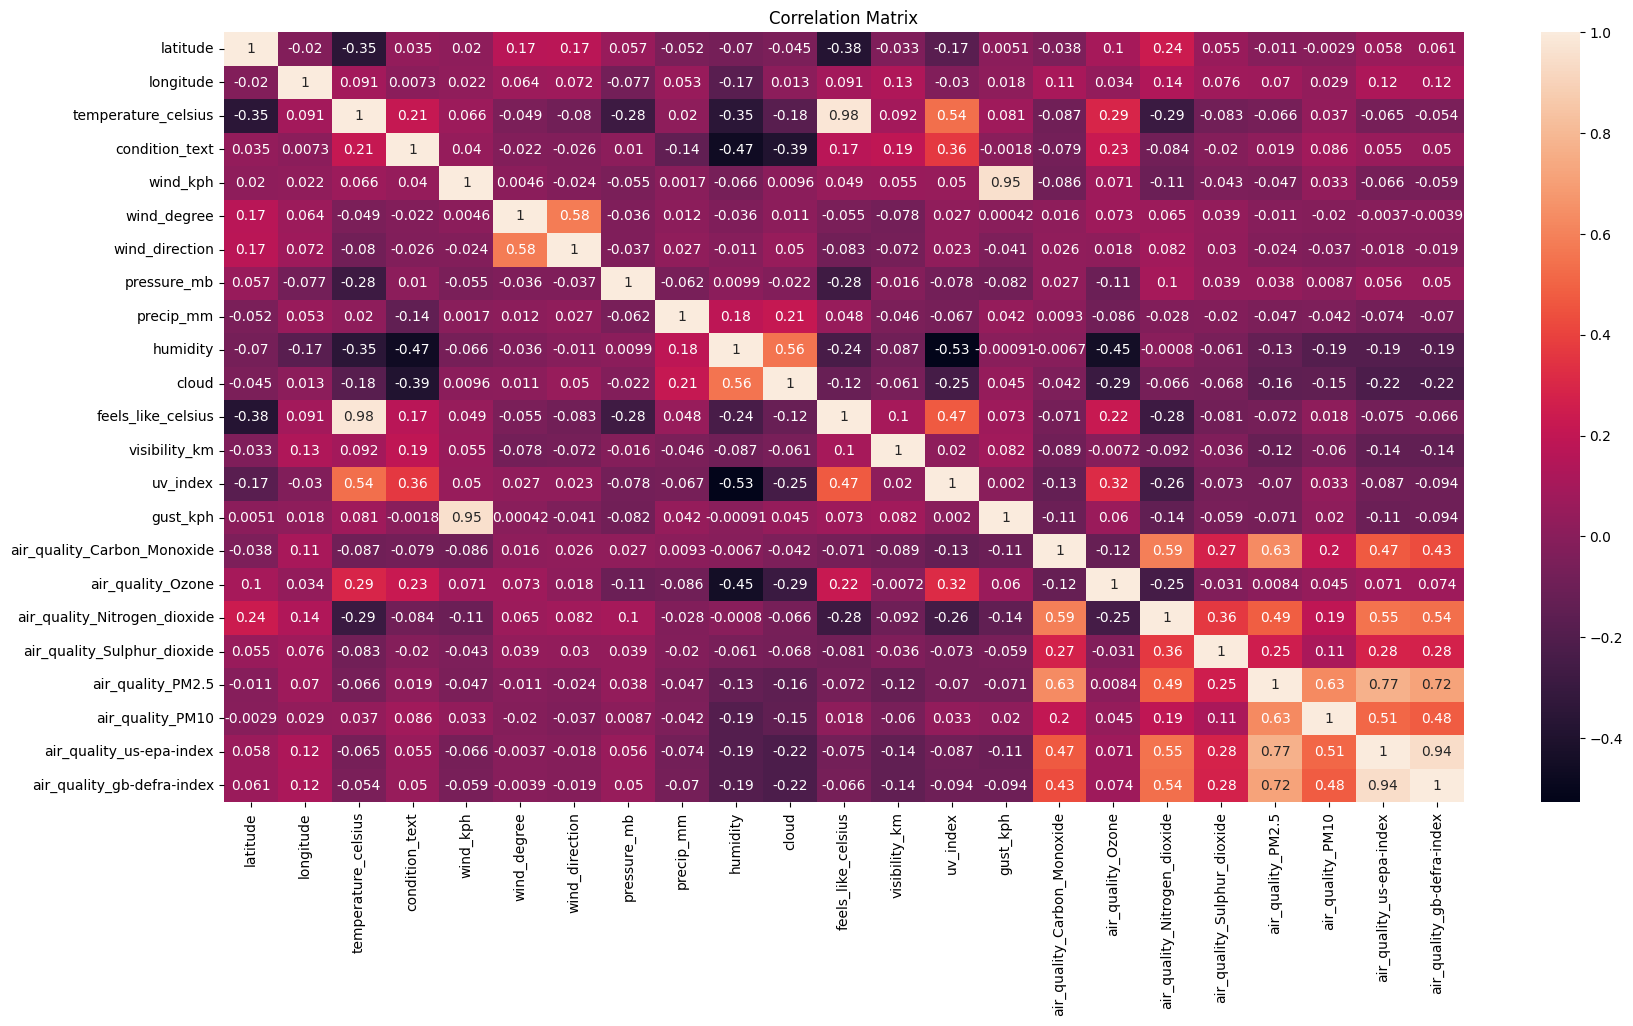

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

#***Outlier Handling & Feature Extraction***

In case of outliers for this case,we cant handle it because all the values in the features are necessary irrespective of the range.

Feature engineering

This part has been done manually, but now using specific methods i am going to see which features are important

In [32]:
x=df2.drop('condition_text',axis=1)
y=df2['condition_text']

In [33]:
feature_extractor=ExtraTreesClassifier(n_estimators=100,criterion='gini')
feature_extractor.fit(x,y)

ExtraTreesClassifier()

In [34]:
features=pd.Series(feature_extractor.feature_importances_,index=x.columns).sort_values(ascending=False)

In [35]:
features

cloud                           0.345505
humidity                        0.076889
visibility_km                   0.060084
longitude                       0.048860
latitude                        0.040472
uv_index                        0.040305
temperature_celsius             0.034554
precip_mm                       0.033788
feels_like_celsius              0.032583
pressure_mb                     0.028981
air_quality_Ozone               0.027228
air_quality_Nitrogen_dioxide    0.024798
gust_kph                        0.024535
air_quality_Carbon_Monoxide     0.024226
wind_kph                        0.023658
wind_degree                     0.022828
air_quality_Sulphur_dioxide     0.022585
air_quality_PM10                0.021948
air_quality_PM2.5               0.021649
wind_direction                  0.020321
air_quality_gb-defra-index      0.014128
air_quality_us-epa-index        0.010073
dtype: float64

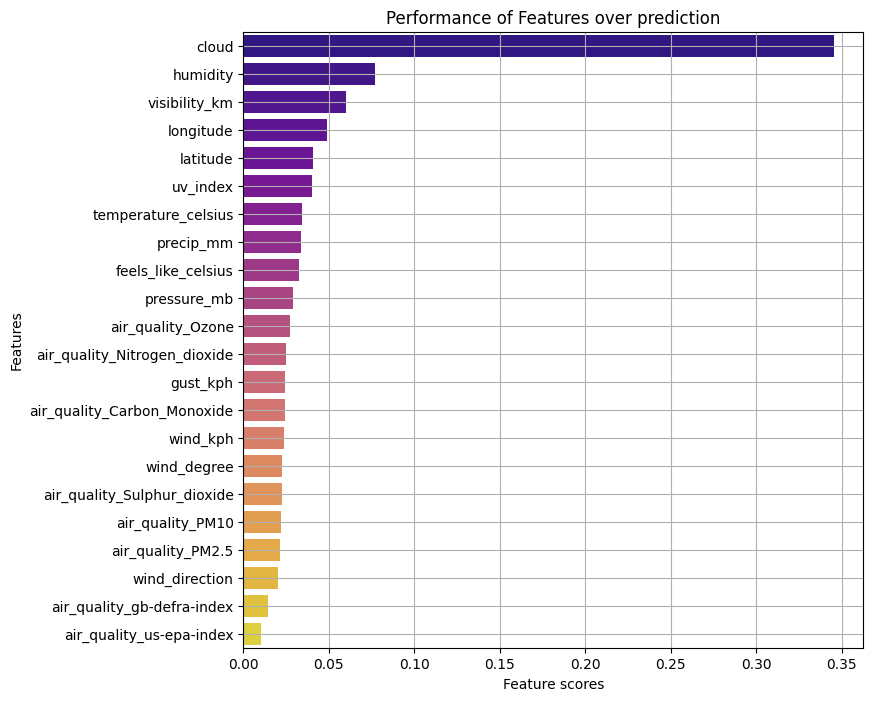

In [36]:
#VIEWING THE VALUES IN THE GRAPHICAL REPRESENTATION
plt.figure(figsize=(8,8))
sns.barplot(x=features,y=features.index,palette='plasma')
plt.title("Performance of Features over prediction")
plt.xlabel('Feature scores')
plt.ylabel('Features')
plt.grid()
plt.show()

Seeing this we can clearly observe that the cloud paramertre is the most powerful one in during prediction by the model.So we are going to hold on to the top performers until the color turns to orange or starting to change to orange visibly.

In [37]:
df2=df2.drop(columns=['air_quality_us-epa-index','air_quality_gb-defra-index','air_quality_PM10','air_quality_PM2.5','wind_degree','wind_direction'])

The below dataset is for the final model training which is taken after feature extraction

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57880 entries, 0 to 57879
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      57880 non-null  float64
 1   longitude                     57880 non-null  float64
 2   temperature_celsius           57880 non-null  float64
 3   condition_text                57880 non-null  int64  
 4   wind_kph                      57880 non-null  float64
 5   pressure_mb                   57880 non-null  float64
 6   precip_mm                     57880 non-null  float64
 7   humidity                      57880 non-null  int64  
 8   cloud                         57880 non-null  int64  
 9   feels_like_celsius            57880 non-null  float64
 10  visibility_km                 57880 non-null  float64
 11  uv_index                      57880 non-null  float64
 12  gust_kph                      57880 non-null  float64
 13  a

#***Time series forecasting***

In [41]:
dfts=df.last_updated

In [42]:
df2.head()

latitude  longitude  temperature_celsius  condition_text  wind_kph  \
0     34.52      69.18                 26.6              29      13.3   
1     41.33      19.82                 19.0              30      11.2   
2     36.76       3.05                 23.0              43      15.1   
3     42.50       1.52                  6.3              10      11.9   
4     -8.84      13.23                 26.0              30      13.0   

   pressure_mb  precip_mm  humidity  cloud  feels_like_celsius  visibility_km  \
0       1012.0        0.0        24     30                25.3           10.0   
1       1012.0        0.1        94     75                19.0           10.0   
2       1011.0        0.0        29      0                24.6           10.0   
3       1007.0        0.3        61    100                 3.8            2.0   
4       1011.0        0.0        89     50                28.7           10.0   

   uv_index  gust_kph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0       7.0      15.3                        277.0              103.0   
1       5.0      18.4                        193.6               97.3   
2       5.0      22.3                        540.7               12.2   
3       2.0      13.7                        170.2               64.4   
4       8.0      20.2                       2964.0               19.0   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  
0                           1.1                          0.2  
1                           0.9                          0.1  
2                          65.1                         13.4  
3                           1.6                          0.2  
4                          72.7                         31.5

In [43]:
dfts=pd.concat([dfts,df2],axis=1)

In [44]:
dfts.head()

last_updated  latitude  longitude  temperature_celsius  \
0 2024-05-16 13:15:00     34.52      69.18                 26.6   
1 2024-05-16 10:45:00     41.33      19.82                 19.0   
2 2024-05-16 09:45:00     36.76       3.05                 23.0   
3 2024-05-16 10:45:00     42.50       1.52                  6.3   
4 2024-05-16 09:45:00     -8.84      13.23                 26.0   

   condition_text  wind_kph  pressure_mb  precip_mm  humidity  cloud  \
0              29      13.3       1012.0        0.0        24     30   
1              30      11.2       1012.0        0.1        94     75   
2              43      15.1       1011.0        0.0        29      0   
3              10      11.9       1007.0        0.3        61    100   
4              30      13.0       1011.0        0.0        89     50   

   feels_like_celsius  visibility_km  uv_index  gust_kph  \
0                25.3           10.0       7.0      15.3   
1                19.0           10.0       5.0      18.4   
2                24.6           10.0       5.0      22.3   
3                 3.8            2.0       2.0      13.7   
4                28.7           10.0       8.0      20.2   

   air_quality_Carbon_Monoxide  air_quality_Ozone  \
0                        277.0              103.0   
1                        193.6               97.3   
2                        540.7               12.2   
3                        170.2               64.4   
4                       2964.0               19.0   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  
0                           1.1                          0.2  
1                           0.9                          0.1  
2                          65.1                         13.4  
3                           1.6                          0.2  
4                          72.7                         31.5

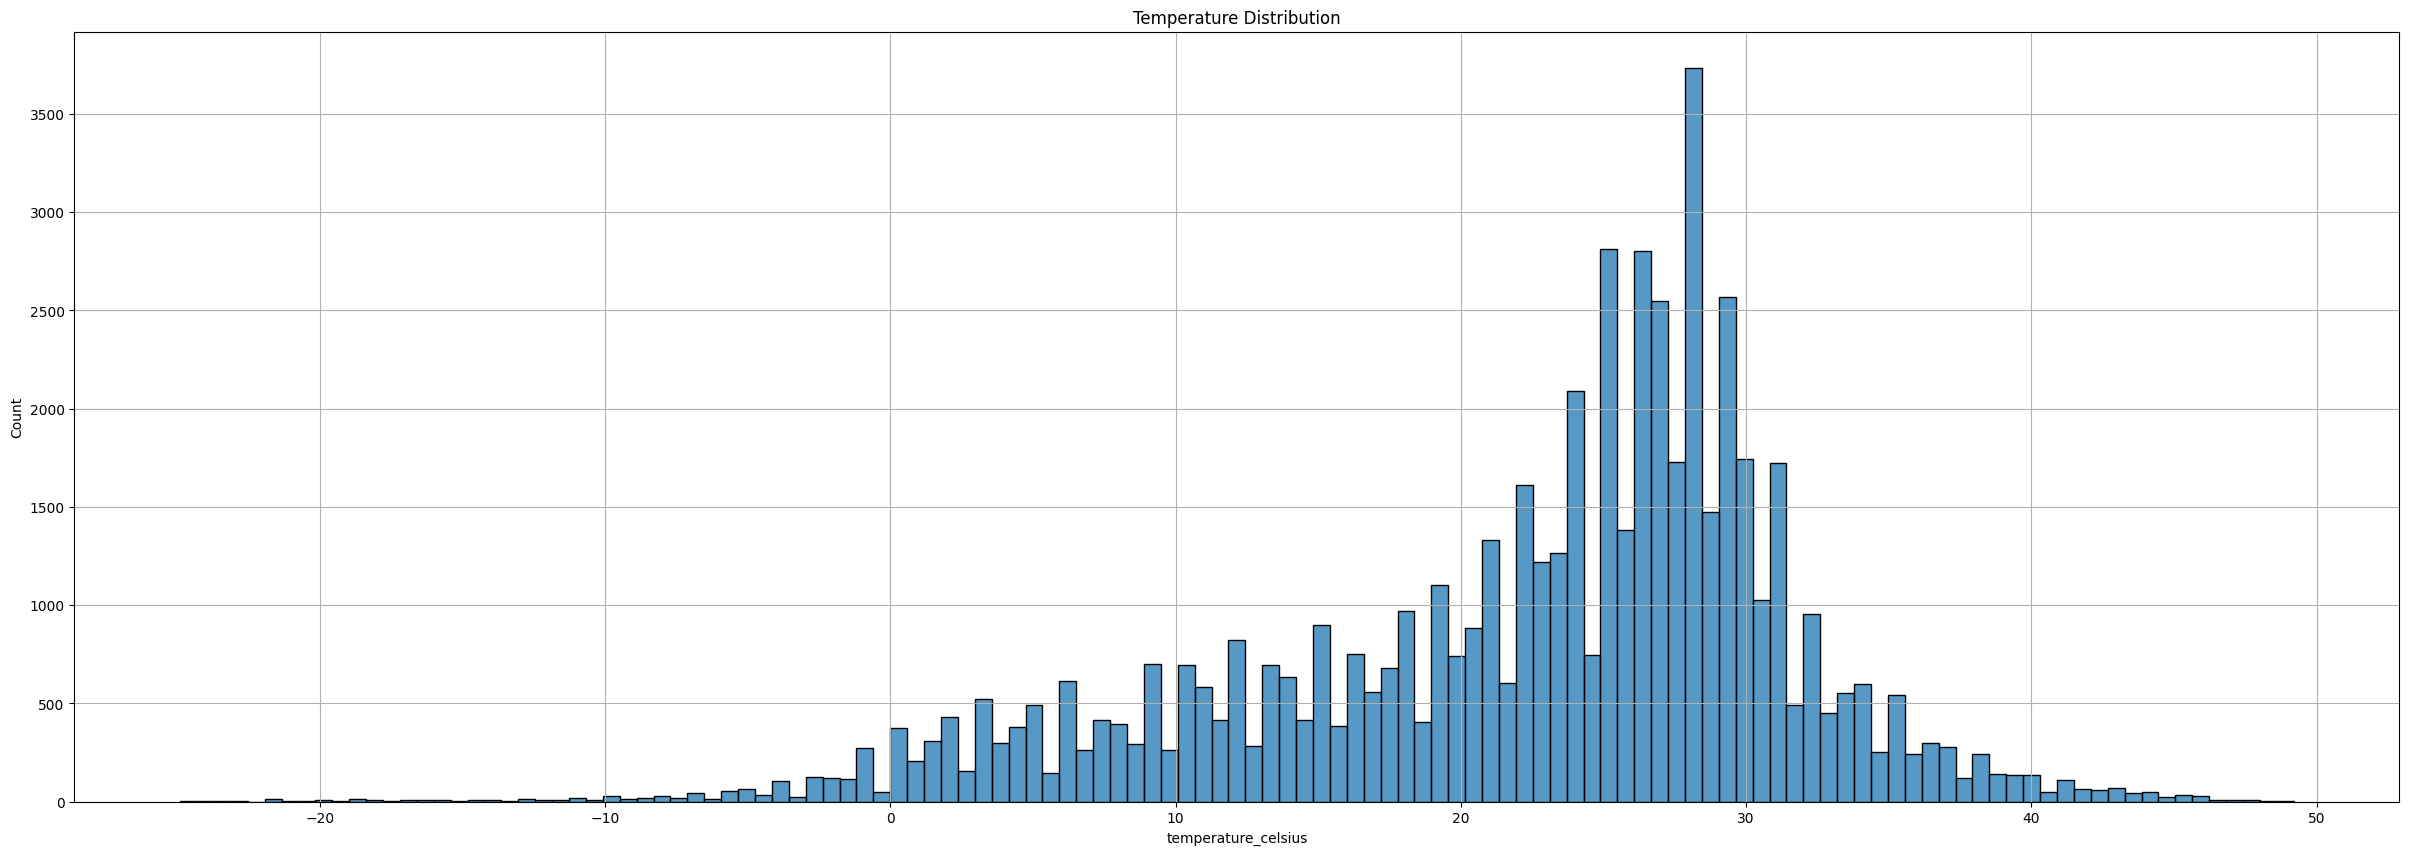

In [45]:
plt.figure(figsize=(30,10))
sns.histplot(dfts['temperature_celsius'],kde=False)
plt.title("Temperature Distribution")
plt.grid()
plt.show()

In [46]:
dfts.columns

Index(['last_updated', 'latitude', 'longitude', 'temperature_celsius',
       'condition_text', 'wind_kph', 'pressure_mb', 'precip_mm', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide'],
      dtype='object')

In [47]:
dfts.last_updated=pd.to_datetime(dfts.last_updated)

In [48]:
dfts.head()

last_updated  latitude  longitude  temperature_celsius  \
0 2024-05-16 13:15:00     34.52      69.18                 26.6   
1 2024-05-16 10:45:00     41.33      19.82                 19.0   
2 2024-05-16 09:45:00     36.76       3.05                 23.0   
3 2024-05-16 10:45:00     42.50       1.52                  6.3   
4 2024-05-16 09:45:00     -8.84      13.23                 26.0   

   condition_text  wind_kph  pressure_mb  precip_mm  humidity  cloud  \
0              29      13.3       1012.0        0.0        24     30   
1              30      11.2       1012.0        0.1        94     75   
2              43      15.1       1011.0        0.0        29      0   
3              10      11.9       1007.0        0.3        61    100   
4              30      13.0       1011.0        0.0        89     50   

   feels_like_celsius  visibility_km  uv_index  gust_kph  \
0                25.3           10.0       7.0      15.3   
1                19.0           10.0       5.0      18.4   
2                24.6           10.0       5.0      22.3   
3                 3.8            2.0       2.0      13.7   
4                28.7           10.0       8.0      20.2   

   air_quality_Carbon_Monoxide  air_quality_Ozone  \
0                        277.0              103.0   
1                        193.6               97.3   
2                        540.7               12.2   
3                        170.2               64.4   
4                       2964.0               19.0   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  
0                           1.1                          0.2  
1                           0.9                          0.1  
2                          65.1                         13.4  
3                           1.6                          0.2  
4                          72.7                         31.5

In [49]:
dfts.set_index('last_updated',inplace=True)

In [50]:
dfts.head()

latitude  longitude  temperature_celsius  condition_text  \
last_updated                                                                    
2024-05-16 13:15:00     34.52      69.18                 26.6              29   
2024-05-16 10:45:00     41.33      19.82                 19.0              30   
2024-05-16 09:45:00     36.76       3.05                 23.0              43   
2024-05-16 10:45:00     42.50       1.52                  6.3              10   
2024-05-16 09:45:00     -8.84      13.23                 26.0              30   

                     wind_kph  pressure_mb  precip_mm  humidity  cloud  \
last_updated                                                             
2024-05-16 13:15:00      13.3       1012.0        0.0        24     30   
2024-05-16 10:45:00      11.2       1012.0        0.1        94     75   
2024-05-16 09:45:00      15.1       1011.0        0.0        29      0   
2024-05-16 10:45:00      11.9       1007.0        0.3        61    100   
2024-05-16 09:45:00      13.0       1011.0        0.0        89     50   

                     feels_like_celsius  visibility_km  uv_index  gust_kph  \
last_updated                                                                 
2024-05-16 13:15:00                25.3           10.0       7.0      15.3   
2024-05-16 10:45:00                19.0           10.0       5.0      18.4   
2024-05-16 09:45:00                24.6           10.0       5.0      22.3   
2024-05-16 10:45:00                 3.8            2.0       2.0      13.7   
2024-05-16 09:45:00                28.7           10.0       8.0      20.2   

                     air_quality_Carbon_Monoxide  air_quality_Ozone  \
last_updated                                                          
2024-05-16 13:15:00                        277.0              103.0   
2024-05-16 10:45:00                        193.6               97.3   
2024-05-16 09:45:00                        540.7               12.2   
2024-05-16 10:45:00                        170.2               64.4   
2024-05-16 09:45:00                       2964.0               19.0   

                     air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  
last_updated                                                                    
2024-05-16 13:15:00                           1.1                          0.2  
2024-05-16 10:45:00                           0.9                          0.1  
2024-05-16 09:45:00                          65.1                         13.4  
2024-05-16 10:45:00                           1.6                          0.2  
2024-05-16 09:45:00                          72.7                         31.5

In [51]:
dfts_final=dfts.resample('D').mean()

In [52]:
len(dfts_final.index)

299

In [53]:
dfts_final.tail()

latitude  longitude  temperature_celsius  condition_text  \
last_updated                                                              
2025-03-06    19.107269  22.088991            20.140000       31.517949   
2025-03-07    19.107269  22.088991            19.951282       31.594872   
2025-03-08    19.031162  22.019812            20.015979       31.500000   
2025-03-09    19.107269  22.088991            20.011795       31.543590   
2025-03-10    19.107269  22.088991            20.410256       30.497436   

               wind_kph  pressure_mb  precip_mm   humidity      cloud  \
last_updated                                                            
2025-03-06    13.767179  1015.169231   0.087128  62.743590  36.153846   
2025-03-07    12.893846  1015.200000   0.106769  62.835897  34.779487   
2025-03-08    12.718041  1013.675258   0.318041  63.572165  31.948454   
2025-03-09    11.852308  1013.102564   0.136410  62.758974  35.723077   
2025-03-10    12.062051  1012.784615   0.132410  64.487179  36.861538   

              feels_like_celsius  visibility_km  uv_index   gust_kph  \
last_updated                                                           
2025-03-06             20.578462       9.443590  3.370256  19.443590   
2025-03-07             20.521026       9.715385  3.277949  17.942051   
2025-03-08             20.613918       9.425258  3.264948  17.738660   
2025-03-09             20.605641       9.616410  3.343077  16.495897   
2025-03-10             21.137949       9.570769  3.270769  16.796410   

              air_quality_Carbon_Monoxide  air_quality_Ozone  \
last_updated                                                   
2025-03-06                     598.380785          65.456410   
2025-03-07                     605.831477          63.630769   
2025-03-08                     629.776716          63.634021   
2025-03-09                     598.098738          62.892308   
2025-03-10                     634.852251          62.958974   

              air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  
last_updated                                                             
2025-03-06                       23.579113                    12.973303  
2025-03-07                       22.455482                    13.599303  
2025-03-08                       19.689294                    14.607402  
2025-03-09                       19.953677                    15.831103  
2025-03-10                       24.187585                    16.617554

Checking for any null rows in the final dataset for forecasting

In [54]:
dfts_final=dfts_final.drop(columns=['latitude','longitude','condition_text'],axis=1)

In [55]:
dfts_final.isna().sum()

temperature_celsius             1
wind_kph                        1
pressure_mb                     1
precip_mm                       1
humidity                        1
cloud                           1
feels_like_celsius              1
visibility_km                   1
uv_index                        1
gust_kph                        1
air_quality_Carbon_Monoxide     1
air_quality_Ozone               1
air_quality_Nitrogen_dioxide    1
air_quality_Sulphur_dioxide     1
dtype: int64

Now finding which date has null values

In [56]:
dfts_final[dfts_final.isnull().any(axis=1)]

temperature_celsius  wind_kph  pressure_mb  precip_mm  humidity  \
last_updated                                                                    
2024-07-22                    NaN       NaN          NaN        NaN       NaN   

              cloud  feels_like_celsius  visibility_km  uv_index  gust_kph  \
last_updated                                                                 
2024-07-22      NaN                 NaN            NaN       NaN       NaN   

              air_quality_Carbon_Monoxide  air_quality_Ozone  \
last_updated                                                   
2024-07-22                            NaN                NaN   

              air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  
last_updated                                                             
2024-07-22                             NaN                          NaN

In [57]:
len(dfts_final.index)

299

In [58]:
dfts_final.count()

temperature_celsius             298
wind_kph                        298
pressure_mb                     298
precip_mm                       298
humidity                        298
cloud                           298
feels_like_celsius              298
visibility_km                   298
uv_index                        298
gust_kph                        298
air_quality_Carbon_Monoxide     298
air_quality_Ozone               298
air_quality_Nitrogen_dioxide    298
air_quality_Sulphur_dioxide     298
dtype: int64

In [59]:
dfts_final.loc['2024-07-22']=dfts_final.loc['2024-07-21']

In [60]:
dfts_final.loc['2024-07-22']

temperature_celsius               20.600000
wind_kph                          12.600000
pressure_mb                     1012.833333
precip_mm                          0.385000
humidity                          76.000000
cloud                             42.500000
feels_like_celsius                22.616667
visibility_km                     10.000000
uv_index                           1.000000
gust_kph                          23.050000
air_quality_Carbon_Monoxide      213.900000
air_quality_Ozone                 52.450000
air_quality_Nitrogen_dioxide       1.100000
air_quality_Sulphur_dioxide        1.416667
Name: 2024-07-22 00:00:00, dtype: float64

Checking again for null in the specific date

In [61]:
dfts_final[dfts_final.isnull().any(axis=1)]

Empty DataFrame
Columns: [temperature_celsius, wind_kph, pressure_mb, precip_mm, humidity, cloud, feels_like_celsius, visibility_km, uv_index, gust_kph, air_quality_Carbon_Monoxide, air_quality_Ozone, air_quality_Nitrogen_dioxide, air_quality_Sulphur_dioxide]
Index: []

Train/Test Split

In [62]:
dfts_final.tail()

temperature_celsius   wind_kph  pressure_mb  precip_mm  \
last_updated                                                           
2025-03-06              20.140000  13.767179  1015.169231   0.087128   
2025-03-07              19.951282  12.893846  1015.200000   0.106769   
2025-03-08              20.015979  12.718041  1013.675258   0.318041   
2025-03-09              20.011795  11.852308  1013.102564   0.136410   
2025-03-10              20.410256  12.062051  1012.784615   0.132410   

               humidity      cloud  feels_like_celsius  visibility_km  \
last_updated                                                            
2025-03-06    62.743590  36.153846           20.578462       9.443590   
2025-03-07    62.835897  34.779487           20.521026       9.715385   
2025-03-08    63.572165  31.948454           20.613918       9.425258   
2025-03-09    62.758974  35.723077           20.605641       9.616410   
2025-03-10    64.487179  36.861538           21.137949       9.570769   

              uv_index   gust_kph  air_quality_Carbon_Monoxide  \
last_updated                                                     
2025-03-06    3.370256  19.443590                   598.380785   
2025-03-07    3.277949  17.942051                   605.831477   
2025-03-08    3.264948  17.738660                   629.776716   
2025-03-09    3.343077  16.495897                   598.098738   
2025-03-10    3.270769  16.796410                   634.852251   

              air_quality_Ozone  air_quality_Nitrogen_dioxide  \
last_updated                                                    
2025-03-06            65.456410                     23.579113   
2025-03-07            63.630769                     22.455482   
2025-03-08            63.634021                     19.689294   
2025-03-09            62.892308                     19.953677   
2025-03-10            62.958974                     24.187585   

              air_quality_Sulphur_dioxide  
last_updated                               
2025-03-06                      12.973303  
2025-03-07                      13.599303  
2025-03-08                      14.607402  
2025-03-09                      15.831103  
2025-03-10                      16.617554

In [64]:
import tensorflow as tf

# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available and memory growth is enabled.")
else:
    print("No GPU detected. The model will run on CPU.")

GPU is available and memory growth is enabled.


Time Series using XGBOOST

Model creation and training for forecasting using xgboost algorithm

In [65]:
import xgboost as xgb

In [66]:
X = dfts_final.drop(columns=['temperature_celsius'])
y = dfts_final['temperature_celsius']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [69]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [70]:
y_pred = model.predict(X_test)

In [71]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.02733809991664689


In [74]:
#performing RMSE test
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.16534237181269323


Plotting for reference of performance

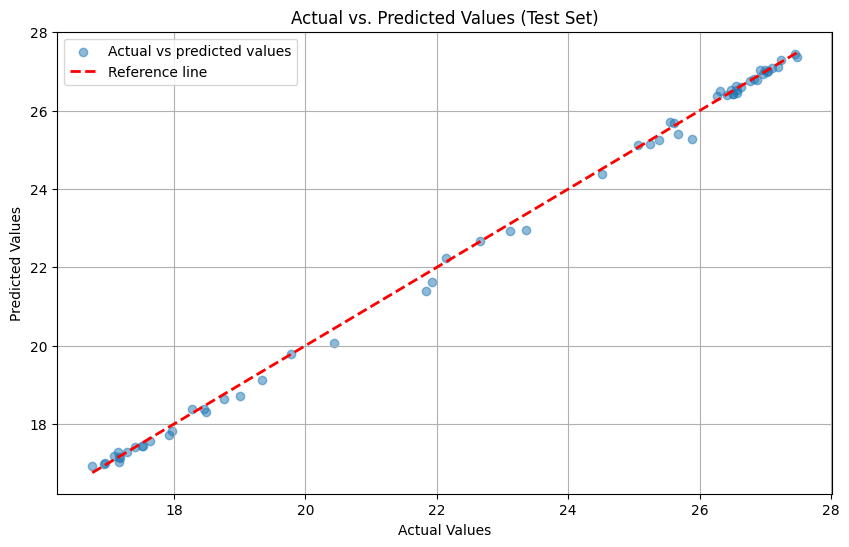

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5,label='Actual vs predicted values')  # Scatter plot of actual vs. predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2,label="Reference line")  # Diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
import joblib
joblib.dump(model, 'xgboost_best_fitted_model.pkl')
# Load the model from the file
#loaded_model = joblib.load('xgboost_best_fitted_model.pkl')

['xgboost_best_fitted_model.pkl']

Predicting weather using ARIMA and SARIMA(if it is seasonal)

Performing dicky fuller test for checking whether it is stationary or not

In [82]:
def perform_dicky_fuller_test(data):
    """Performs the Dickey-Fuller test for stationarity.

    Args:
        data: The time series data.

    Returns:
        A tuple containing the ADF statistic, p-value, and critical values.
    """
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")
    return result

In [83]:
def difference_transform(data, order=1):
    """Applies differencing to the time series.

    Args:
        data: The time series data.
        order: The order of differencing (default is 1).

    Returns:
        The differenced time series.
    """
    return data.diff(order)


In [84]:
def log_transform(data):
    """Applies logarithmic transformation to the time series.

    Args:
        data: The time series data.

    Returns:
        The log-transformed time series.
    """
    return np.log(data)


In [85]:
def sqrt_transform(data):
    """Applies square root transformation to the time series.

    Args:
        data: The time series data.

    Returns:
        The square root transformed time series.
    """
    return np.sqrt(data)

In [86]:
# Performing Dickey-Fuller test
dicky_fuller_result = perform_dicky_fuller_test(dfts_final['temperature_celsius'])

ADF Statistic: -0.8232459413495964
p-value: 0.8121982076030478
Critical Values: {'1%': np.float64(-3.452789844280995), '5%': np.float64(-2.871421512222641), '10%': np.float64(-2.5720351510944512)}
The time series is non-stationary.


since the time series is non stationary, we are going to try different methods to change it into an stationary dataset to perform time series forecasting using ARIMA model

In [87]:
# Apply differencing
differenced_data = difference_transform(dfts_final['temperature_celsius'])

In [101]:
np.inf

inf

In [99]:
differenced_data.replace([np.inf, -np.inf], np.nan, inplace=True)
differenced_data.dropna(inplace=True)

Reperforming dickyfuller test

In [104]:
dicky_fuller_result=perform_dicky_fuller_test(differenced_data)

ADF Statistic: -12.366083679557011
p-value: 5.410496581252008e-23
Critical Values: {'1%': np.float64(-3.452789844280995), '5%': np.float64(-2.871421512222641), '10%': np.float64(-2.5720351510944512)}
The time series is stationary.


In [ ]:
# Apply log transformation
#log_transformed_data = log_transform(dfts_final['temperature_celsius'])

# Apply square root transformation
#sqrt_transformed_data = sqrt_transform(dfts_final['temperature_celsius'])

Performing ARIMA forecasting

In [115]:
# Defining the ARIMA model order (p, d, q)
# p: Autoregressive order
# d: Differencing order
# q: Moving average order
p=5
d=1
q=0

# Create the ARIMA model
model = ARIMA(differenced_data, order=(p, d, q))

# Fit the model
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=1, end=len(differenced_data) - 1)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(differenced_data[1:], predictions)

print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.41500961845483125


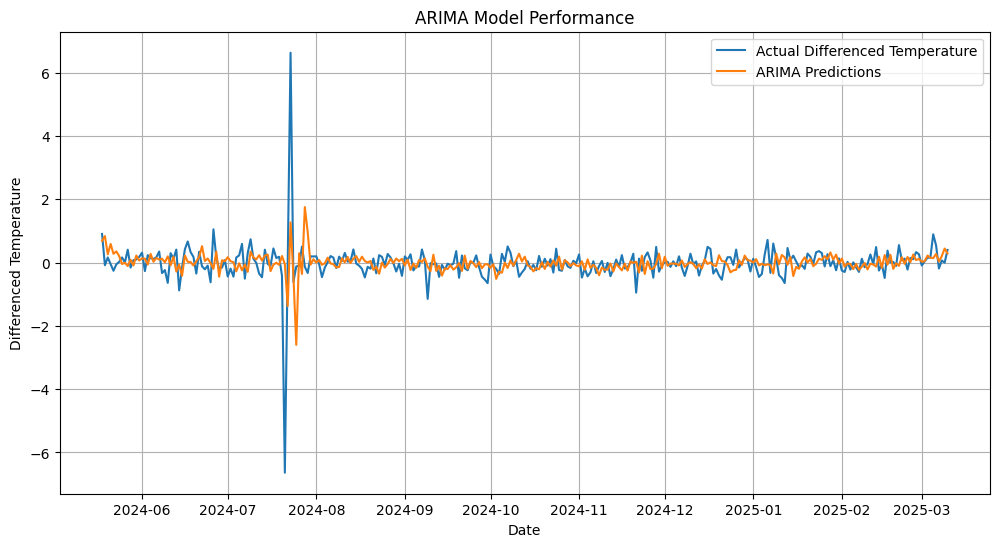

Root Mean Squared Error (RMSE): 0.6442124016617743


In [116]:
#Plotting graph using 'differenced_data' and 'predictions'
plt.figure(figsize=(12, 6))
plt.plot(differenced_data[1:], label='Actual Differenced Temperature')
plt.plot(predictions, label='ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Differenced Temperature')
plt.title('ARIMA Model Performance')
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


In [119]:
# Saving the ARIMA model
joblib.dump(model_fit, 'arima_model.pkl')

# we can load the model later using:
# loaded_arima_model = joblib.load('arima_model.pkl')

['arima_model.pkl']

In [120]:
# Defining the SARIMA model order (p, d, q) and seasonal order (P, D, Q, s)
# p, d, q: Non-seasonal ARIMA order
# P, D, Q: Seasonal ARIMA order
# s: Seasonal period (e.g., 12 for monthly data)


order = (5, 1, 0)
seasonal_order = (1, 1, 1, 12)

# Creating the SARIMA model
sarima_model = SARIMAX(differenced_data, order=order, seasonal_order=seasonal_order)

# Fitting the model
sarima_model_fit = sarima_model.fit()

# Making predictions
predictions = model_fit.predict(start=1, end=len(differenced_data) - 1)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(differenced_data[1:], predictions)

print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.41500961845483125


In [121]:
joblib.dump(sarima_model_fit, 'sarima_model.pkl')

['sarima_model.pkl']

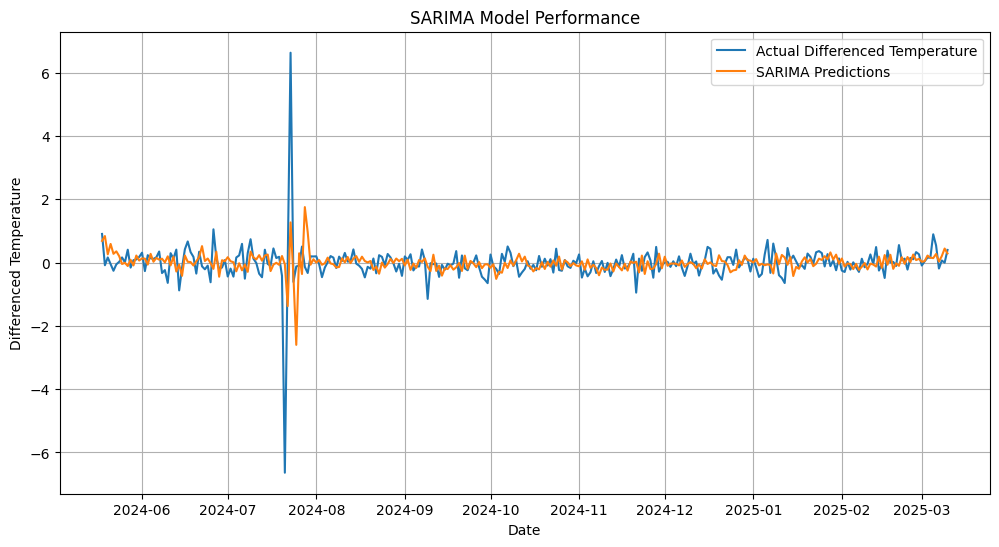

In [122]:
# Plotting actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(differenced_data[1:], label='Actual Differenced Temperature')
plt.plot(predictions, label='SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Differenced Temperature')
plt.title('SARIMA Model Performance')
plt.legend()
plt.grid(True)
plt.show()

***Time series forecasting using facebook prophet***

In [ ]:
from prophet import Prophet
from prophet.diagnostics import performance_metrics,cross_validation

Dataset preparation

In [ ]:
df_prophet=dfts_final[['temperature_celsius']].reset_index()


Checking for any null values

In [ ]:
df_prophet[df_prophet.isnull().any(axis=1)]

Empty DataFrame
Columns: [last_updated, temperature_celsius]
Index: []

In [ ]:
data=df_prophet.rename(columns={'last_updated':'ds','temperature_celsius':'y'})

In [ ]:
model=Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp96i3ippp/mijcbtpa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp96i3ippp/o1egkiln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27977', 'data', 'file=/tmp/tmp96i3ippp/mijcbtpa.json', 'init=/tmp/tmp96i3ippp/o1egkiln.json', 'output', 'file=/tmp/tmp96i3ippp/prophet_model6a5bzt3z/prophet_model-20250324181511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:15:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:15:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_forecast=model.make_future_dataframe(periods=30)
forecast=model.predict(future_forecast)

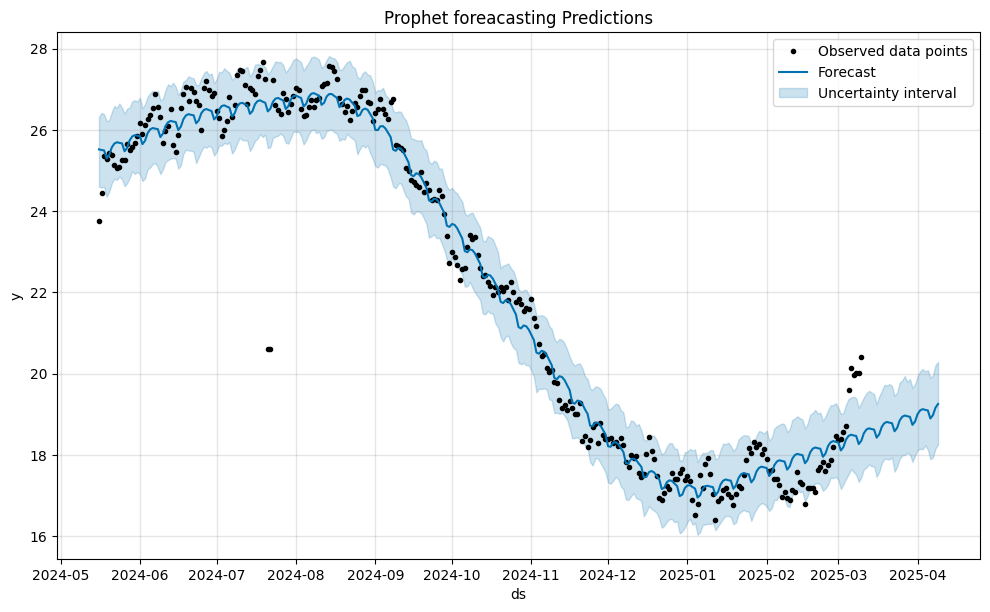

In [ ]:
#plotting the forecast
fig1=model.plot(forecast)
plt.title("Prophet foreacasting Predictions")
plt.legend()
#fig2=model.plot_components(forecast)

#***Anomaly Detection***

In [127]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import joblib  # Import joblib for saving the model

# Assuming 'df2' is your preprocessed DataFrame
# Select the relevant features for anomaly detection
data = df2.drop(columns=['latitude','longitude'])

# Create an IsolationForest model
model = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the data
model.fit(data)

# Get anomaly scores
df2['anomaly_score'] = model.decision_function(data)

# Identify anomalies
df2['anomaly'] = model.predict(data)

# Save the model using joblib
joblib.dump(model, 'isolation_forest_model.pkl')


['isolation_forest_model.pkl']

Viewing the anomaly scores

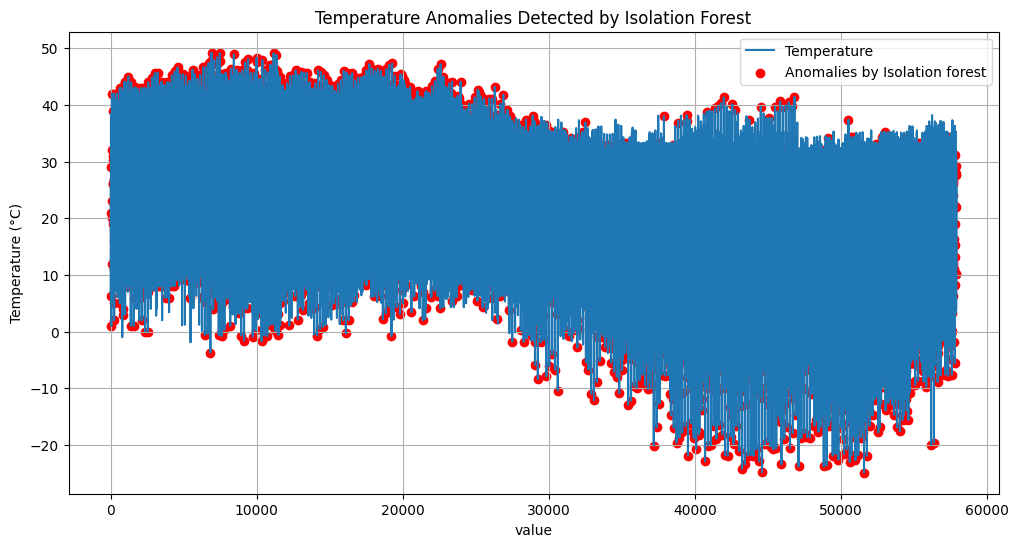

In [138]:
#Plotting for visualizing predicted anomalies
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['temperature_celsius'], label='Temperature')  # Plotting temperature over time
plt.scatter(df2[df2['anomaly'] == -1].index, df2[df2['anomaly'] == -1]['temperature_celsius'], color='red', label='Anomalies by Isolation forest')  # Highlighting anomalies in red

plt.xlabel('value')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Anomalies Detected by Isolation Forest')
plt.legend()
plt.grid(True)
plt.show()